#  Data Science

## Notebook 1. (introduction, exploratory analysis)

### IPython

* IPython command shell for interactive computing in multiple programming languages, originally developed for Python.
* Powerful interactive shells (terminal and Qt-based).
* A browser-based notebook with support for code, text, mathematical expressions, inline plots and rich media.
* Support for interactive data visualization and use of GUI toolkits.
* Flexible, embeddable interpreters to load into one's own projects.

### Useful packages

#### SciPy - A collection of packages:

* NumPy - N-dimenional arrays
* SciPy library - scientific computing
* Matplotlib - for plotting
* Sympy - symbolic math
* pandas - data analysis

In [4]:
import numpy as np

In [5]:
!pip3 install numpy

In [1]:
from IPython.display import Image, display
from IPython.display import HTML

In [2]:
%%capture --no-display
HTML('<iframe src=http://www.scipy.org/ width=1000 height=350></iframe>')

#### Scikit- learn - machine learning in Python

In [3]:
%%capture --no-display
HTML('<iframe src=http://scikit-learn.org/stable/ width=1000 height=400></iframe>')

### Data formats

#### Possible data formats

* Lists, dictionaries
* NumPy arrays
* DataFrame objects from Pandas package
* ...

Scikit-learn, Pandas, NumPy and Matplotlib are all interlinked and work well together.

Transferring between data formats is not always so trivial!

#### Simple lists

In [8]:
int_var = 1
data1 = [1,2,3]

In [9]:
type(int_var)

int

In [10]:
data1[0]

1

## Numpy array

* an N-dimensional array
* fast, flexible container for large data sets in Python

Numpy documentation: https://docs.scipy.org/doc/numpy-dev/user/index.html

Numpy cheat sheet

In [ ]:
%%capture --no-display
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf width=1000 height=400></iframe>')

In [11]:
import numpy as np

In [12]:
array1 = np.array(data1)

In [13]:
array1

array([1, 2, 3])

Multidimensional arrays

In [14]:
array2 = np.array([[1,2,3],[2,3,4]])

In [15]:
array2

array([[1, 2, 3],
       [2, 3, 4]])

### Indexing

In [16]:
array3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Fetch row

In [17]:
array3[2]

array([7, 8, 9])

Fetch column

In [18]:
array3[:,0]

array([1, 4, 7])

<span style="color:red">How can I fetch the value 8 from the array above?</span>

In [19]:
array3[2][1]

8

In [20]:
array3[2,1]

8

Detailed description about arrays:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html

http://docs.scipy.org/doc/numpy/reference/arrays.html

### Data types

* Different attributes may have different types
* Numpy (and pandas) will infer the type if none is specified
* Incompatible types will lead to errors

In [21]:
array4 = np.array([1.25, 'hello', 42])
array4

array(['1.25', 'hello', '42'], dtype='<U32')

U32 is a 32 character unicode string

In [22]:
array5 = np.array([1, 2, 3.1, 4, 5])
type(array5[0])
array5.dtype

dtype('float64')

Numpy infers reasonable data types. For example, a string cannot be interpretted as an int but an int can be interpretted as a string. Information is lost when you cast a float as an int but not vice versa.

The data type can be set globally

In [23]:
np.array([ 3, -1, -2, 0, 12.1, 10], dtype='int32')

array([ 3, -1, -2,  0, 12, 10])

In [24]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.unicode_)
numeric_strings

array(['1.25', '-9.6', '42'], dtype='<U4')

Type casting in python and numpy

<span style="color:red">Why is it important to be aware of data types?</span>

In [25]:
numeric_strings[0] + 1

TypeError: can only concatenate str (not "int") to str

In [26]:
float(numeric_strings[0]) + 1

2.25

In [27]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Overview of numpy data types:

http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

Pandas extends many numpy data types

### Structured arrays

In [28]:
structured_array = np.array([(1, 2.0, 'Hello'), (2, 3.0, 'World')],dtype=[('col0', 'i4'), ('col1', 'f4'), ('col2', '|U10')])
structured_array

array([(1, 2., 'Hello'), (2, 3., 'World')],
      dtype=[('col0', '<i4'), ('col1', '<f4'), ('col2', '<U10')])

In [29]:
structured_array['col0']

array([1, 2])

We have two records of three features:
32-bit integer, 32-bit floating point number, 10-character string

### Import data from file to NumPy array

In [30]:
from io import StringIO   # StringIO behaves like a file object

In [31]:
d = StringIO('M 21 72\n F 35 58\n F 55 66')
dat = np.loadtxt(d, dtype={'names': ('gender', 'age', 'weight'),
                     'formats': ('S1', 'i4', 'f4')})
dat

array([(b'M', 21, 72.), (b'F', 35, 58.), (b'F', 55, 66.)],
      dtype=[('gender', 'S1'), ('age', '<i4'), ('weight', '<f4')])

The function np.loadtxt works in byte mode, in Python 2 this is the default string type. On the other hand, Python 3 uses unicode, and denotes byte-strings by b.

Selecting columns

In [32]:
dat['gender']

array([b'M', b'F', b'F'], dtype='|S1')

In [33]:
dat[['gender','weight']]

array([(b'M', 72.), (b'F', 58.), (b'F', 66.)],
      dtype={'names': ['gender', 'weight'], 'formats': ['S1', '<f4'], 'offsets': [0, 5], 'itemsize': 9})

In [ ]:
c = StringIO("1,0,2\n3,0,4")
x = np.loadtxt(c, delimiter=',', usecols=(0,2))
x

### Importing data from local files

Importing data from file, we should pay attention to the access path of the file.

We have to know in which folder the notebook is running and where is the file.

Instead of absolute path, it is better to use relative paths, for more details [see here](https://www.computerhope.com/issues/ch001708.htm).

* . : is the current directory

* .. :  is the parent of the current directory.

* / or \: is the root of the current drive

While doing the homework problems you should also use relative pathways while importing files, mimicking the folder structure given in this notebook.

In [34]:
import sys
f = open("../Data/bank.csv",'r')
bank_data = np.loadtxt(f, dtype={'names': ('age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'),
                                 'formats': ('i', 'S6', 'S10', 'f', 'S3', 'i2', 'S3', 'S3', 'S3', 'S3', 'S3')})
bank_data[0:10]

array([(48, b'FEMALE', b'INNER_CITY', 17546.  , b'NO', 1, b'NO', b'NO', b'NO', b'NO', b'YES'),
       (40, b'MALE', b'TOWN', 30085.1 , b'YES', 3, b'YES', b'NO', b'YES', b'YES', b'NO'),
       (51, b'FEMALE', b'INNER_CITY', 16575.4 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (23, b'FEMALE', b'TOWN', 20375.4 , b'YES', 3, b'NO', b'NO', b'YES', b'NO', b'NO'),
       (57, b'FEMALE', b'RURAL', 50576.3 , b'YES', 0, b'NO', b'YES', b'NO', b'NO', b'NO'),
       (57, b'FEMALE', b'TOWN', 37869.6 , b'YES', 2, b'NO', b'YES', b'YES', b'NO', b'YES'),
       (22, b'MALE', b'RURAL',  8877.07, b'NO', 0, b'NO', b'NO', b'YES', b'NO', b'YES'),
       (58, b'MALE', b'TOWN', 24946.6 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (37, b'FEMALE', b'SUBURBAN', 25304.3 , b'YES', 2, b'YES', b'NO', b'NO', b'NO', b'NO'),
       (54, b'MALE', b'TOWN', 24212.1 , b'YES', 2, b'YES', b'YES', b'YES', b'NO', b'NO')],
      dtype=[('age', '<i4'), ('sex', 'S6'), ('region', 'S10'), ('income', '<f4')

#### Attributes of bank dataset

* age: age of customer in years (numeric)
* sex: MALE / FEMALE
* region: inner_city/rural/suburban/town
* income: income of customer (numeric)
* married: is the customer married (YES/NO)
* children: number of children (numeric)
* car: does the customer own a car (YES/NO)
* save_acct: does the customer have a saving account (YES/NO)
* current_acct: does the customer have a current account (YES/NO)
* mortgage: does the customer have a mortgage (YES/NO)
* pep: did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO)

#### A little visualization

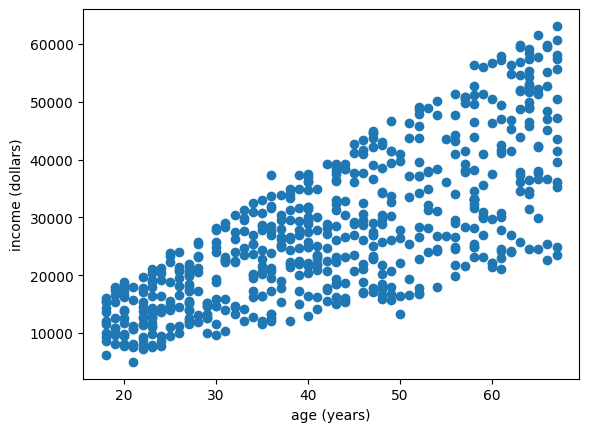

In [35]:
x = bank_data['age']
y = bank_data['income']

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(x,y)
plt.xlabel('age (years)')
plt.ylabel('income (dollars)')
plt.show()

Matplotlib documentation:
    
https://matplotlib.org/

Matplotlib cheat sheet

In [36]:
%%capture --no-display
HTML('<iframe src=https://matplotlib.org/cheatsheets/cheatsheets.pdf width=1000 height=400></iframe>')

### Pandas

* A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects
* One column of a DataFrame is a pandas series object. A series is a one-dimensional labeled array capable of holding any data type (integers, strings, etc.). The axis labels are collectively referred to as the index

Pandas cheat sheet

In [ ]:
%%capture --no-display
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf width=1000 height=400></iframe>')

In [37]:
import pandas as pd

In [38]:
!pip3 install pandas

#### 3 MoviLens data files:
* demographic information about the users (includes "user_id")
* information about the movies (includes "movie_id")
* movie ratings (includes "user_id" and "movie_id")

Load the users data, using pandas read_csv() function. There is also read_json(), read_excel(), etc.

We can take a look at the data file in the url.

<span style="color:red">What's the delimiter in this file?</span>

In [61]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [40]:
users.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

You can see that pandas implements numpy behind the scenes, leveraging numpy's array computation capabilities. You can also easily move between pandas and numpy:

In [41]:
numpy_users = users.to_numpy()
numpy_users

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [42]:
pd.DataFrame(numpy_users)

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [45]:
users.shape

(943, 5)

Load movie ratings data

In [60]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Load data about the movies

In [86]:
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [50]:
# sum(movies['video_release_date'].isnull())
# len(movies)


In [51]:
movies

,movie_id,title,release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...


#### Some basic information about the data

In [52]:
print(movies.dtypes)
print(movies.describe())

movie_id         int64
title           object
release_date    object
imdb_url        object
dtype: object
          movie_id
count  1682.000000
mean    841.500000
std     485.695893
min       1.000000
25%     421.250000
50%     841.500000
75%    1261.750000
max    1682.000000


Pandas uses the same type casting syntax as numpy

In [53]:
movies['title'] = movies['title'].astype(str)
type(movies.at[0,'title']) 

str

Pandas extends the numpy "datetime64" data type

In [54]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

#### Selecting, filtering, visualizing the data

In [55]:
users.tail(10)

,user_id,age,sex,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Indexing into dataframe

In [67]:
# two ways to select a column
users_col = users['occupation']
users.occupation

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object

In [68]:
type(users_col)

pandas.core.series.Series

In [69]:
users_col.to_list()
users_col.to_numpy()

array(['technician', 'other', 'writer', 'technician', 'other',
       'executive', 'administrator', 'administrator', 'student', 'lawyer',
       'other', 'other', 'educator', 'scientist', 'educator',
       'entertainment', 'programmer', 'other', 'librarian', 'homemaker',
       'writer', 'writer', 'artist', 'artist', 'engineer', 'engineer',
       'librarian', 'writer', 'programmer', 'student', 'artist',
       'student', 'student', 'administrator', 'homemaker', 'student',
       'student', 'other', 'entertainment', 'scientist', 'engineer',
       'administrator', 'librarian', 'technician', 'programmer',
       'marketing', 'marketing', 'administrator', 'student', 'writer',
       'educator', 'student', 'programmer', 'executive', 'programmer',
       'librarian', 'none', 'programmer', 'educator', 'healthcare',
       'engineer', 'administrator', 'marketing', 'educator', 'educator',
       'student', 'student', 'student', 'engineer', 'engineer',
       'scientist', 'administrator', 'st

In [70]:
columns_you_want = ['occupation', 'sex']
users[columns_you_want].head()

,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


In [73]:
# select a single value, .loc and .iloc are two indexing methods
users.at[0,'occupation']


# users.loc[0,'occupation']
users.iloc[0,3]

'technician'

In [74]:
# select a row
users.loc[0,:]

user_id                1
age                   24
sex                    M
occupation    technician
zip_code           85711
Name: 0, dtype: object

### Plotting with pandas

Notice that pandas implements matplotlib behind the scenes too, so you can use commands such as plt.title() in combination with your pandas plots

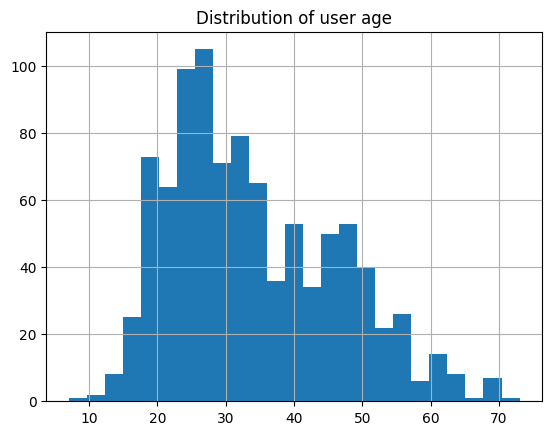

In [75]:
import matplotlib.pyplot as plt

users.age.hist(bins=25)
plt.title('Distribution of user age')
plt.show()

Selecting a slice of the dataframe based on certain criteria

In [76]:
# two equivalent ways to slice data frame
users_over_25 = users.query('age > 25')
users_over_25 = users[users.age > 25]
users_over_25.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [77]:
users[(users.age == 40) & (users.sex == 'M')].head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


Use these techniques to answer questions such as, whats the average age of female programmers in this dataset?

In [78]:
# select users who are both female and programmers
selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

# show statistic summary
print(selected_users.describe())

# or use the built in mean() function
print(selected_users.age.mean())
print(selected_users['age'].mean())

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
32.166666666666664
32.166666666666664


##### Split-apply-combine

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.

##### Average rating of users 

In [79]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [80]:
user_mean = ratings.groupby(['user_id'])['rating'].mean() #or sum(), count(), median(), etc.
user_mean.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

<span style="color:red">How many rows are there in "user_mean"?</span>
<span style="color:red">How many rows would there be if I grouped by "movie_id" instead?</span>

In [82]:
# len(user_mean)
len(users)
# len(movies)

943

Another way, using the apply() method to apply a CUSTOM function

<span style="color:red">What does x refer to?</span>

In [83]:
movie_mean = ratings.groupby(['movie_id'])['rating']
average_ratings = movie_mean.apply(lambda x: x.mean()+2)
average_ratings.head()

movie_id
1    5.878319
2    5.206107
3    5.033333
4    5.550239
5    5.302326
Name: rating, dtype: float64

What is the highest rated movie?

In [84]:
average_ratings.sort_values(ascending = False)[0:9]

movie_id
814     7.0
1599    7.0
1201    7.0
1122    7.0
1653    7.0
1293    7.0
1500    7.0
1189    7.0
1536    7.0
Name: rating, dtype: float64

In [85]:
# search df based on single value
movies[movies['movie_id']==814]

,movie_id,title,release_date,video_release_date,imdb_url
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...


In [86]:
# another way, use pd.merge() to join to dataframes

print(type(average_ratings))
avg_ratings_df = pd.DataFrame(average_ratings)
merged = movies.merge(avg_ratings_df, on='movie_id')
merged.sort_values(by='rating', ascending=False).head()

<class 'pandas.core.series.Series'>


,movie_id,title,release_date,video_release_date,imdb_url,rating
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,7.0
1598,1599,Someone Else's America (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Someone%20Els...,7.0
1200,1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,7.0
1121,1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,7.0
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Entertaining%...,7.0


In [91]:
movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [90]:
users['occupation'].value_counts().tail()

occupation
lawyer       12
salesman     12
none          9
homemaker     7
doctor        7
Name: count, dtype: int64

### Practice Questions:
1. Drop the "video_release_date" column from the movies data frame.
2. What is the most common occupation of people in the users data frame?
3. Create a new column that contains "release_year" as an integer. Plot the distribution of this column. When are most of the movies in this dataset from?

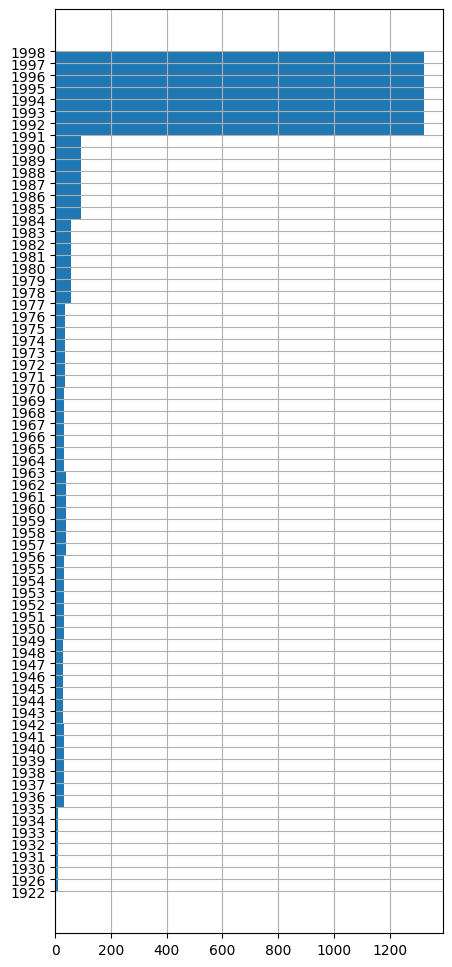

In [105]:
## Question 1:
movies = movies.drop(labels='video_release_date',axis=1)

## Question 2:
users['occupation'].value_counts()

## Question 3:
movies['release_year'] = movies.release_date.str[-4:]
movies = movies.dropna(axis=0,subset=['release_date'])
movies['release_year'].astype(int)
movies['release_year'].sort_values().hist(orientation='horizontal', figsize=(5,12))
plt.show()
